# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [39]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [19]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.shape

(1000000, 8)

**Steps:**

In [20]:
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

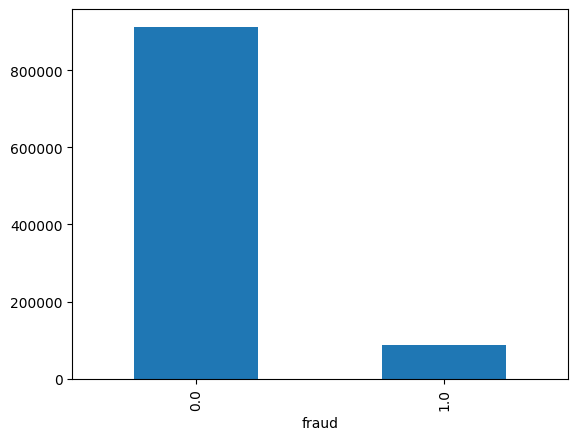

In [21]:
fraud_count = fraud["fraud"].value_counts()
fraud_count.plot(kind="bar")
plt.show()

In [22]:
X = fraud.drop(columns='fraud')
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [33]:
y = fraud['fraud']
X = fraud.drop(columns='fraud')
X_num_1 = X[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']]
X_num_2 = X[['repeat_retailer','used_chip','used_pin_number','online_order']]
X = pd.concat([X_num_1, X_num_2], axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg.score(X_test_scaled, y_test)

0.958836

### OVERSAMPLE

In [37]:
yes_fraud = fraud[fraud['fraud'] == 1]
no_fraud = fraud[fraud['fraud'] == 0]
yes_fraud.shape, no_fraud.shape

((87403, 8), (912597, 8))

In [40]:
survived_oversampled = resample(yes_fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

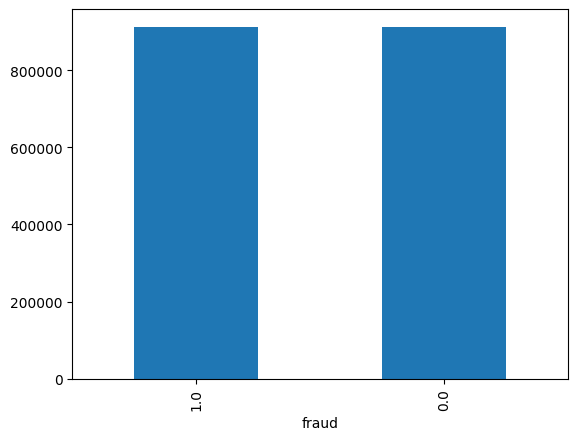

In [44]:
train_over = pd.concat([survived_oversampled, no_fraud])
fraud_count = train_over["fraud"].value_counts()
fraud_count.plot(kind="bar")
plt.show()

In [47]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)
log_reg.score(X_test_scaled, y_test)

c:\Users\FX516\Desktop\Codes\DatAnalist\DatAnalist\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\FX516\Desktop\Codes\DatAnalist\DatAnalist\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.869164

### UNDERSAMPLED

In [48]:
survived_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(yes_fraud),
                                    random_state=0)

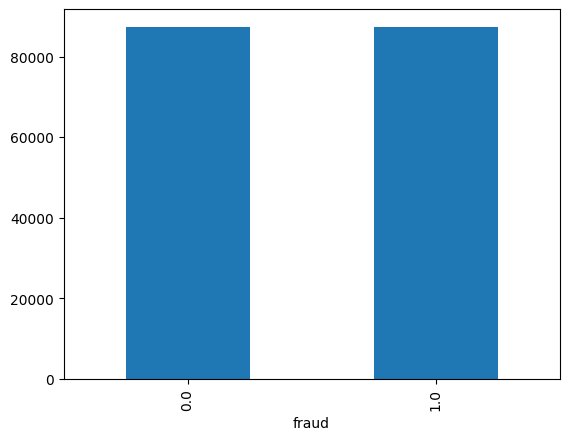

In [53]:
train_under = pd.concat([survived_undersampled, yes_fraud])
fraud_count_under = train_under["fraud"].value_counts()
fraud_count_under.plot(kind="bar")
plt.show()

In [54]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)
log_reg.score(X_test_scaled, y_test)

c:\Users\FX516\Desktop\Codes\DatAnalist\DatAnalist\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\FX516\Desktop\Codes\DatAnalist\DatAnalist\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.895408

### SMOTE

In [55]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)
log_reg = LogisticRegression()
log_reg.fit(X_train_sm, y_train_sm)
log_reg.score(X_test_scaled, y_test)

0.93408